In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
# Load the datasets
episodes_path = "data/power_rangers_episodes.csv"
seasons_path = "data/power_rangers_seasons.csv"

episodes_df = pd.read_csv(episodes_path)
seasons_df = pd.read_csv(seasons_path)

# Display basic information and first few rows of each dataset
episodes_info = episodes_df.info(), episodes_df.head()
seasons_info = seasons_df.info(), seasons_df.head()

episodes_info, seasons_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season_title   921 non-null    object 
 1   episode_num    921 non-null    int64  
 2   episode_title  921 non-null    object 
 3   air_date       921 non-null    object 
 4   IMDB_rating    921 non-null    float64
 5   total_votes    921 non-null    int64  
 6   desc           921 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season_title        28 non-null     object 
 1   season_num          28 non-null     int64  
 2   number_of_episodes  28 non-null     int64  
 3   air_date_first_ep   28 non-null     object 
 4   air_date_last_ep    28 non-null     

((None,
                  season_title  episode_num          episode_title    air_date  \
  0  Mighty Morphin (Season 1)            0       The Lost Episode  1999-05-22   
  1  Mighty Morphin (Season 1)            1    Day of the Dumpster  1993-08-28   
  2  Mighty Morphin (Season 1)            2              High Five  1993-09-04   
  3  Mighty Morphin (Season 1)            3               Teamwork  1993-09-08   
  4  Mighty Morphin (Season 1)            4  A Pressing Engagement  1993-09-09   
  
     IMDB_rating  total_votes                                               desc  
  0          6.7          113          Original version of the premiere episode.  
  1          7.4          687  Following the accidental release of long-impri...  
  2          6.9          564  Rita plans to trap the Rangers in a time trap ...  
  3          7.3          546  Trini and Kimberly set up a petition to clean ...  
  4          6.9          535  Jason is trying to break the bench press recor...  

In [3]:
# Convert air dates to datetime format
seasons_df['air_date_first_ep'] = pd.to_datetime(seasons_df['air_date_first_ep'])
seasons_df['air_date_last_ep'] = pd.to_datetime(seasons_df['air_date_last_ep'], errors='coerce')  # Handle '2022' which is not a complete date

# Create a column for season duration in days
seasons_df['season_duration'] = (seasons_df['air_date_last_ep'] - seasons_df['air_date_first_ep']).dt.days

# Aggregate total votes per season by summing votes from episodes dataset
season_votes = episodes_df.groupby("season_title")["total_votes"].sum().reset_index()
season_votes.rename(columns={"total_votes": "total_votes_season"}, inplace=True)

# Merge aggregated votes into seasons dataset
seasons_df = seasons_df.merge(season_votes, on="season_title", how="left")


In [4]:
# Display updated dataframe
seasons_df.head()

,season_title,season_num,number_of_episodes,air_date_first_ep,air_date_last_ep,producer,IMDB_rating,season_duration,total_votes_season
0,Mighty Morphin (Season 1),1,60,1993-08-28,1994-05-23,Saban,6.5,268.0,28834.0
1,Mighty Morphin (Season 2),2,52,1994-07-21,1995-05-20,Saban,6.5,303.0,22063.0
2,Mighty Morphin (Season 3),3,33,1995-09-02,1995-11-27,Saban,6.5,86.0,17755.0
3,Zeo,4,50,1996-04-20,1996-11-27,Saban,6.6,221.0,14061.0
4,Turbo,5,45,1997-04-19,1997-11-24,Saban,5.7,219.0,11800.0


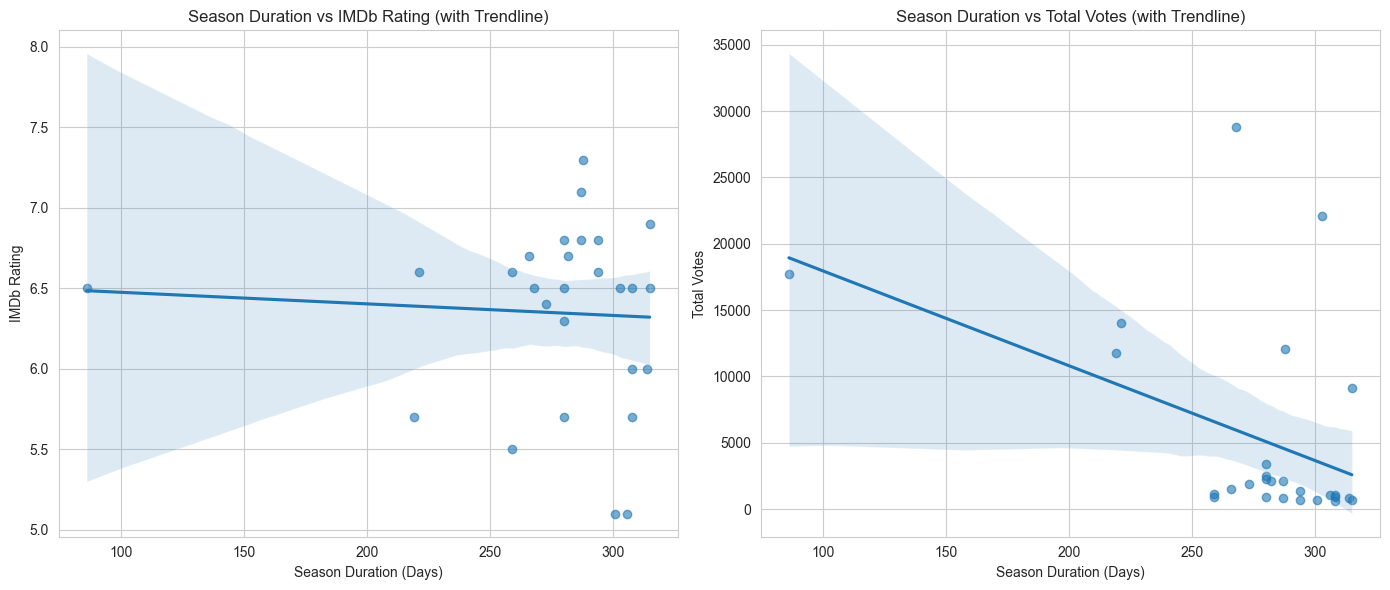

In [7]:

# Set seaborn style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Scatter plot: Season Duration vs IMDb Rating
# sns.scatterplot(data=seasons_df, x="season_duration", y="IMDB_rating", ax=axes[0])
# axes[0].set_title("Season Duration vs IMDb Rating")
# axes[0].set_xlabel("Season Duration (Days)")
# axes[0].set_ylabel("IMDb Rating")

# # Scatter plot: Season Duration vs Total Votes
# sns.scatterplot(data=seasons_df, x="season_duration", y="total_votes_season", ax=axes[1])
# axes[1].set_title("Season Duration vs Total Votes")
# axes[1].set_xlabel("Season Duration (Days)")
# axes[1].set_ylabel("Total Votes")

# Scatter plot with trendline: Season Duration vs IMDb Rating
sns.regplot(data=seasons_df, x="season_duration", y="IMDB_rating", ax=axes[0], scatter_kws={"alpha": 0.6})
axes[0].set_title("Season Duration vs IMDb Rating (with Trendline)")
axes[0].set_xlabel("Season Duration (Days)")
axes[0].set_ylabel("IMDb Rating")

# Scatter plot with trendline: Season Duration vs Total Votes
sns.regplot(data=seasons_df, x="season_duration", y="total_votes_season", ax=axes[1], scatter_kws={"alpha": 0.6})
axes[1].set_title("Season Duration vs Total Votes (with Trendline)")
axes[1].set_xlabel("Season Duration (Days)")
axes[1].set_ylabel("Total Votes")

# Show the plots
plt.tight_layout()
plt.show()

In [6]:
# Compute correlation matrix
correlation_matrix = seasons_df[["season_duration", "IMDB_rating", "total_votes_season"]].corr()

# Display correlation values
correlation_matrix

,season_duration,IMDB_rating,total_votes_season
season_duration,1.000000,-0.057903,-0.430133
IMDB_rating,-0.057903,1.000000,0.218119
total_votes_season,-0.430133,0.218119,1.000000
